# Hw1_成都市租房价格分析

## 1 爬取数据

- 爬虫代码见 lianjia_crawler.py

In [123]:
import matplotlib.font_manager as fm

# 打印所有可用字体
# SimHei不可用
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    print(font)


/System/Library/Fonts/Supplemental/NotoSansSylotiNagri-Regular.ttf
/System/Library/Fonts/Supplemental/Trebuchet MS.ttf
/System/Library/AssetsV2/com_apple_MobileAsset_Font7/aa99d0b2bad7f797f38b49d46cde28fd4b58876e.asset/AssetData/Xingkai.ttc
/System/Library/Fonts/Supplemental/Telugu MN.ttc
/System/Library/Fonts/Supplemental/NotoSansCuneiform-Regular.ttf
/System/Library/AssetsV2/com_apple_MobileAsset_Font7/70816a43827731d40efe234b94feba96db91024f.asset/AssetData/NanumMyeongjo.ttc
/System/Library/Fonts/Supplemental/Rockwell.ttc
/System/Library/AssetsV2/com_apple_MobileAsset_Font7/0818d874bf1d0e24a1fe62e79f407717792c5ee1.asset/AssetData/OsakaMono.ttf
/System/Library/Fonts/ヒラギノ角ゴシック W1.ttc
/System/Library/Fonts/Optima.ttc
/System/Library/AssetsV2/com_apple_MobileAsset_Font7/9fdda46cbe802833590494a09b2787378340c597.asset/AssetData/Hanzipen.ttc
/System/Library/Fonts/Supplemental/NotoSansSiddham-Regular.otf
/System/Library/AssetsV2/com_apple_MobileAsset_Font7/42062e40d643fdb5bb3fba917212352f

In [124]:
import sys
print(sys.executable)
# Pycharm 重启解决问题

/opt/anaconda3/envs/myenv/bin/python


## 2 读取数据

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial']  # 使用系统中可用的中文字体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [126]:
file_data=pd.read_csv('./chengdu_rent.csv')
file_data.head()

,Title,Price,Area,Region,Link
0,整租·悦彩广场 1室1厅 东,1700 元/月,36.81㎡,温江-温江大学城-悦彩广场,https://cd.lianjia.com/zufang/CD19559224339154...
1,整租·天府半岛七期 3室2厅 西南,1900 元/月,91.28㎡,天府新区-锦江生态带-天府半岛七期,https://cd.lianjia.com/zufang/CD19554644353634...
2,整租·翡翠城四期 3室1厅 东南,3300 元/月,87.99㎡,锦江-东湖-翡翠城四期,https://cd.lianjia.com/zufang/CD16993487308864...
3,独栋·龙湖冠寓 成都滨江天街店 【国庆钜惠】东郊记忆3一个月起租可月付短租 0中介今日可看房 开间,1891-2180 元/月,35.00㎡,仅剩2间,https://cd.lianjia.com/apartment/49105.html
4,整租·蓝光T-max 3室2厅 南/西南,3200 元/月,132.52㎡,双流-航空港-蓝光T-max,https://cd.lianjia.com/zufang/CD19558896193125...


In [127]:
file_data.tail()

,Title,Price,Area,Region,Link
2095,合租·东苑E区 5居室 南卧,700 元/月,12.00㎡,高新-东苑-东苑E区,https://cd.lianjia.com/zufang/CD23844762811876...
2096,整租·天府豪庭 3室2厅 南,5000 元/月,101.08㎡,高新-大源-天府豪庭,https://cd.lianjia.com/zufang/CD19236139401771...
2097,整租·新川8号 4室1厅 南,11500 元/月,185.00㎡,高新-广都-新川8号,https://cd.lianjia.com/zufang/CD19236088728959...
2098,整租·纯阳雅庭 3室1厅 东南,1100 元/月,120.34㎡,新津-五津-纯阳雅庭,https://cd.lianjia.com/zufang/CD19236529160490...
2099,整租·彩虹苑 2室1厅 南/西,2200 元/月,79.35㎡,武侯-航空路-彩虹苑,https://cd.lianjia.com/zufang/CD19236589429619...


In [128]:
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   2100 non-null   object
 1   Price   2100 non-null   object
 2   Area    2100 non-null   object
 3   Region  2100 non-null   object
 4   Link    2100 non-null   object
dtypes: object(5)
memory usage: 82.2+ KB


In [130]:
file_data.columns

Index(['Title', 'Price', 'Area', 'Region', 'Link'], dtype='object')

## 3 数据预处理

### 3.1 重复值和空值处理

In [131]:
print("重复数据数量:", file_data.duplicated().sum())
file_data = file_data.drop_duplicates()
print("缺失值统计:\n", file_data.isnull().sum())
file_data = file_data.dropna()

重复数据数量: 128
缺失值统计:
 Title     0
Price     0
Area      0
Region    0
Link      0
dtype: int64


## 4 数据分析

### 4.1 房源数量和分布分析

In [133]:
new_df = pd.DataFrame({'Region': file_data['Region'].unique(), 'Count': [0] * len(file_data['Region'].unique())})
groupy_area = file_data.groupby(by='Region').count()
new_df['Count'] = groupy_area['Price']  

### 4.2 排序

In [134]:
new_df = new_df.sort_values(by=['Count'], ascending=False)

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27743 (\N{CJK UNIFIED IDEOGRAPH-6C5F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22478 (\N{CJK UNIFIED IDEOGRAPH-57

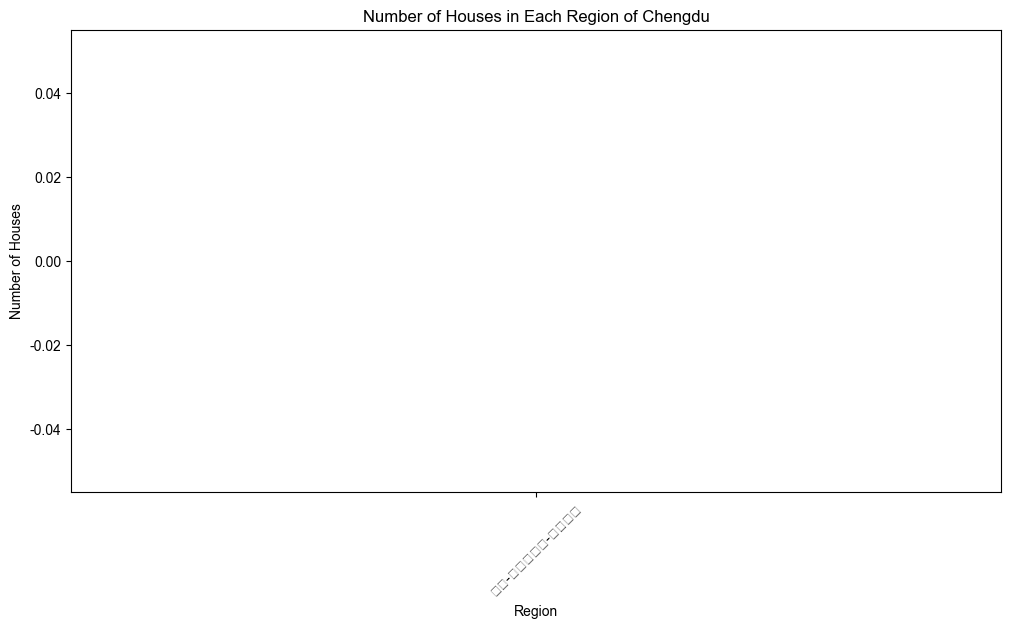

In [137]:
plt.figure(figsize=(12, 6))
plt.bar(new_df['Region'], new_df['Count'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Number of Houses')
plt.title('Number of Houses in Each Region of Chengdu')
plt.xticks(rotation=45)
plt.show()